<a href="https://colab.research.google.com/github/uveysturhan/uveysturhan.github.io/blob/main/Hofstadfer_Hamiltonian_and_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

size: (100, 100)


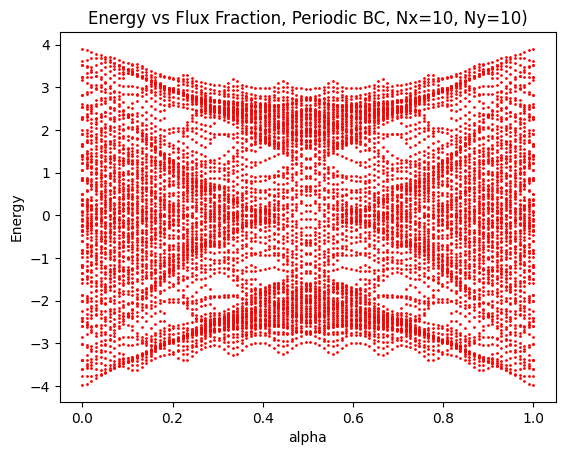

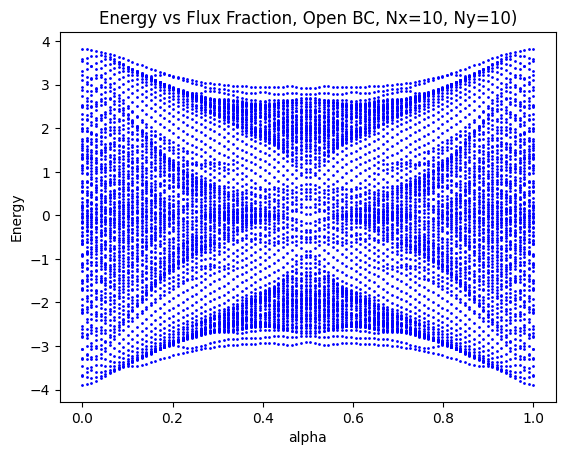

In [19]:
import sympy as sp
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
def find_hamiltonian(Nx, Ny, alpha, t=1.0, boundary_conditions='periodic'):
    H = np.zeros((Nx*Ny, Nx*Ny), dtype=np.complex128)
    for n in range(Ny):
        for m in range(Nx):
            if boundary_conditions == 'periodic':
              m_plus = m+1 % Nx
            else:
              m_plus = m + 1

            if 0 <= m_plus < Nx:
              i= n * Nx + m
              j = n * Nx + m_plus
              phase = np.exp(1j * 2.0 * np.pi * alpha * n)
              H[i, j] = -t * phase
              H[j, i] = -t * np.conjugate(phase)

            if boundary_conditions == 'periodic':
              n_plus = (n + 1) % Ny
            else:
              n_plus = (n + 1)
            if 0 <= n_plus < Ny:
                k = n_plus * Ny + m
                H[i, k] = -t
                H[k, i] = -t

    return H


Nx, Ny = 10, 10
alpha = 1/2
H_check = find_hamiltonian(Nx, Ny, alpha, t=1.0, boundary_conditions='periodic')
print("size:", H_check.shape)
eigvals, eigvecs = np.linalg.eigh(H_check)

#Periyodik

alpha_list = np.linspace(0, 1, 100)

for alpha in alpha_list:
    H_p = find_hamiltonian(Nx, Ny, alpha, t=1.0, boundary_conditions='periodic')
    eigvals = np.linalg.eigh(H_p)[0]
    alphas = []
    energies = []
    alphas.extend([alpha]*len(eigvals))
    energies.extend(eigvals)
    plt.scatter(alphas, energies, s=1, color="r")

plt.xlabel("alpha")
plt.ylabel('Energy')
plt.title(f'Energy vs Flux Fraction, Periodic BC, Nx={Nx}, Ny={Ny})')
plt.show()

#Open

alphas_o = []
energies_o = []

for alpha in alpha_list:
    H_o = find_hamiltonian(Nx, Ny, alpha, t=1.0, boundary_conditions='open')
    eigvals = np.linalg.eigh(H_o)[0]
    alphas_o = []
    energies_o = []
    alphas_o.extend([alpha]*len(eigvals))
    energies_o.extend(eigvals)
    plt.scatter(alphas_o, energies_o, s=1, color="b")

plt.xlabel("alpha")
plt.ylabel('Energy')
plt.title(f'Energy vs Flux Fraction, Open BC, Nx={Nx}, Ny={Ny})')
plt.show()


In [20]:
def show_hamiltonian(Lx, Ly, flux_fraction, hopping, boundary_conditions="periodic"):
  h = find_hamiltonian(Lx, Ly, flux_fraction, hopping, boundary_conditions="periodic")
  sym_matrix = sp.Matrix(h)
  latex_str = sp.latex(sym_matrix)
  return latex_str

display(Math(show_hamiltonian(4, 4, 1/3, 1.0, boundary_conditions="periodic")))

<IPython.core.display.Math object>